In [1]:
import pandas as pd

from sklearn.neighbors     import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')    

In [3]:
print(data.dtypes)

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object


In [4]:
categorical_vars = [
    x for x in data.columns if data[x].dtype == 'object' or x == 'area_code'
    ]

In [5]:
print(categorical_vars)

['state', 'area_code', 'phone_number', 'intl_plan', 'voice_mail_plan']


     state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0       KS             128        415     382-4657        no             yes   
1       OH             107        415     371-7191        no             yes   
2       NJ             137        415     358-1921        no              no   
3       OH              84        408     375-9999       yes              no   
4       OK              75        415     330-6626       yes              no   
...    ...             ...        ...          ...       ...             ...   
4995    HI              50        408     365-8751        no             yes   
4996    WV             152        415     334-9736        no              no   
4997    DC              61        415     333-6861        no              no   
4998    DC             109        510     394-2206        no              no   
4999    VT              86        415     373-8058        no             yes   

      number_vmail_messages  total_day_

In [9]:
# Check cardinality 
for v in categorical_vars:
    
    print ('\n%15s:'%v , "%4d categories" % len(data[v].unique()))
    print (data[v].unique(),'\n')   


          state:   51 categories
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 


      area_code:    3 categories
[415 408 510] 


   phone_number: 5000 categories
['382-4657' '371-7191' '358-1921' ... '333-6861' '394-2206' '373-8058'] 


      intl_plan:    2 categories
['no' 'yes'] 


voice_mail_plan:    2 categories
['yes' 'no'] 



In [10]:
# Discard variables with high cardinalities

data = data.drop(['state','phone_number'],axis=1)

print(data.T)

                                0      1      2      3      4      5     \
account_length                   128    107    137     84     75    118   
area_code                        415    415    415    408    415    510   
intl_plan                         no     no     no    yes    yes    yes   
voice_mail_plan                  yes    yes     no     no     no     no   
number_vmail_messages             25     26      0      0      0      0   
total_day_minutes              265.1  161.6  243.4  299.4  166.7  223.4   
total_day_calls                  110    123    114     71    113     98   
total_day_charge               45.07  27.47  41.38   50.9  28.34  37.98   
total_eve_minutes              197.4  195.5  121.2   61.9  148.3  220.6   
total_eve_calls                   99    103    110     88    122    101   
total_eve_charge               16.78  16.62   10.3   5.26  12.61  18.75   
total_night_minutes            244.7  254.4  162.6  196.9  186.9  203.9   
total_night_calls        

In [11]:
# Apply one-hot encoding to vars with 3 or more categories

data = pd.get_dummies(data,columns=['area_code'])
print (data.head(5).T)

                                   0      1      2      3      4
account_length                   128    107    137     84     75
intl_plan                         no     no     no    yes    yes
voice_mail_plan                  yes    yes     no     no     no
number_vmail_messages             25     26      0      0      0
total_day_minutes              265.1  161.6  243.4  299.4  166.7
total_day_calls                  110    123    114     71    113
total_day_charge               45.07  27.47  41.38   50.9  28.34
total_eve_minutes              197.4  195.5  121.2   61.9  148.3
total_eve_calls                   99    103    110     88    122
total_eve_charge               16.78  16.62   10.3   5.26  12.61
total_night_minutes            244.7  254.4  162.6  196.9  186.9
total_night_calls                 91    103    104     89    121
total_night_charge             11.01  11.45   7.32   8.86   8.41
total_intl_minutes              10.0   13.7   12.2    6.6   10.1
total_intl_calls         

In [12]:
# Binarize vars with 2 categories

binarizer = LabelBinarizer()
for v in ['intl_plan','voice_mail_plan']:
    data[v] = binarizer.fit_transform(data[v])
print (data.head(5).T)

                                   0      1      2      3      4
account_length                   128    107    137     84     75
intl_plan                          0      0      0      1      1
voice_mail_plan                    1      1      0      0      0
number_vmail_messages             25     26      0      0      0
total_day_minutes              265.1  161.6  243.4  299.4  166.7
total_day_calls                  110    123    114     71    113
total_day_charge               45.07  27.47  41.38   50.9  28.34
total_eve_minutes              197.4  195.5  121.2   61.9  148.3
total_eve_calls                   99    103    110     88    122
total_eve_charge               16.78  16.62   10.3   5.26  12.61
total_night_minutes            244.7  254.4  162.6  196.9  186.9
total_night_calls                 91    103    104     89    121
total_night_charge             11.01  11.45   7.32   8.86   8.41
total_intl_minutes              10.0   13.7   12.2    6.6   10.1
total_intl_calls         

In [13]:
# Check amount of samples from each class

print(data['churned'].value_counts())

False    4293
True      707
Name: churned, dtype: int64


In [14]:
# Check mean of each attribute for every class

print(data.groupby(['churned']).mean().T)

churned                             False        True
account_length                  99.917074  102.332390
intl_plan                        0.063825    0.281471
voice_mail_plan                  0.284416    0.144272
number_vmail_messages            8.291870    4.496464
total_day_minutes              175.746564  207.870580
total_day_calls                 99.899604  100.817539
total_day_charge                29.877494   35.338416
total_eve_minutes              198.805031  211.757850
total_eve_calls                100.241556   99.884017
total_eve_charge                16.898654   17.999562
total_night_minutes            199.455113  206.078218
total_night_calls               99.975775   99.575672
total_night_charge               8.975593    9.273607
total_intl_minutes              10.190869   10.692362
total_intl_calls                 4.481947    4.151344
total_intl_charge                2.752055    2.887426
number_customer_service_calls    1.457722    2.254597
area_code_408               

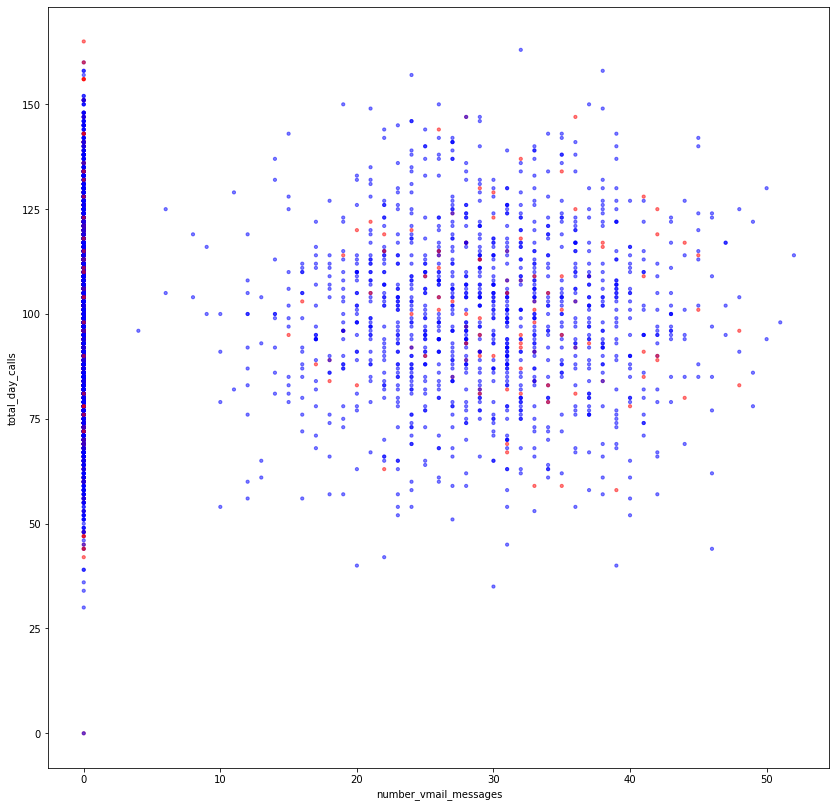

In [21]:
# Plot a diagram of class dispersion

attribute1 = 'number_vmail_messages'
attribute2 = 'total_day_calls'

colors = [ 'red' if x else 'blue' for x in data['churned'] ]

graph = data.plot.scatter(
    attribute1,
    attribute2,
    c      = colors,
    s      = 10,
    marker = 'o',
    alpha  = 0.5,
    figsize = (14,14)
    )

plt.show()

In [22]:
# Select attributes to be used in the classifier

selected = [
    'account_length',
    'intl_plan',
    'voice_mail_plan',
    'number_vmail_messages',
    'total_day_minutes',
    #'total_day_calls',
    'total_day_charge',
    #'total_eve_minutes',
    #'total_eve_calls',
    #'total_eve_charge',
    #'total_night_minutes',
    #'total_night_calls',
    #'total_night_charge',
    'total_intl_minutes',
    'total_intl_calls',
    'total_intl_charge',
    'number_customer_service_calls',
    #'area_code_408',
    #'area_code_415',
    #'area_code_510'
    'churned'
    ]

data = data[selected]

In [23]:
# Shuffle data

shuffled = data.sample(frac=1,random_state=2308)

In [24]:
# Separate target and attributes

x = shuffled.loc[:,shuffled.columns!='churned'].values
y = shuffled.loc[:,shuffled.columns=='churned'].values

In [26]:
# Separate x and y in training data and testing data

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y.ravel(),
    train_size=4000,
    shuffle=True,
    random_state=777
    )

In [27]:
# Adjust the scale of the attributes

scaler = MinMaxScaler()
scaler.fit(x_treino)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

In [28]:
# Train a KNN classifier with the training set

classifier = KNeighborsClassifier(n_neighbors=5)

classifier = classifier.fit(x_train,y_train)

In [29]:
# Classifier answers in training set

y_train_answers = classifier.predict(x_train)

In [30]:
# Classifier answers in testing set

y_test_answers = classifier.predict(x_test)

In [32]:
# Check accuracy

print ("\nPERFORMANCE IN TRAINING SAMPLE\n")

total   = len(y_train)
correct = sum(y_train_answers==y_train)
errors   = sum(y_train_answers!=y_train)

print ("Total of samples: " , total)
print ("Correct answers:" , correct)
print ("Wrong answers: " , errors)

accuracy = correct / total

print ("Accuracy = %.1f %%" % (100*accuracy))

print ("\nPERFORMANCE OUTSIDE THE TRAINING SAMPLE\n")

total   = len(y_test)
correct = sum(y_test_answers==y_test)
errors   = sum(y_test_answers!=y_test)

print ("Total of samples: " , total)
print ("Correct answers:" , correct)
print ("Wrong answers: " , errors)

accuracy = correct / total

print ("Accuracy = %.1f %%" % (100*accuracy))


PERFORMANCE IN TRAINING SAMPLE

Total of samples:  4000
Correct answers: 3712
Wrong answers:  288
Accuracy = 92.8 %

PERFORMANCE OUTSIDE THE TRAINING SAMPLE

Total of samples:  1000
Correct answers: 900
Wrong answers:  100
Accuracy = 90.0 %


In [33]:
# Observe change in accuracy based on k

print ( "\n  K TRAIN  TEST")
print ( " -- ------- ------")

for k in range(1,26,2):

    classifier = KNeighborsClassifier(
        n_neighbors = k,
        weights     = 'uniform',
        p           = 1
        )
    classifier = classifier.fit(x_train,y_train)

    y_train_answers = classifier.predict(x_train)
    y_test_answers  = classifier.predict(x_test)
    
    train_accuracy = sum(y_train_answers==y_train)/len(y_train)
    test_accuracy  = sum(y_test_answers ==y_test) /len(y_test)
    
    print(
        "%3d"%k,
        "%6.1f" % (100*train_accuracy),
        "%6.1f" % (100*test_accuracy)
        )


  K TRAIN  TEST
 -- ------- ------
  1  100.0   87.8
  3   94.0   90.5
  5   92.9   90.7
  7   92.3   91.0
  9   91.5   90.8
 11   91.0   90.3
 13   90.8   90.7
 15   90.6   90.6
 17   90.5   90.6
 19   90.4   90.2
 21   90.2   90.1
 23   90.1   90.3
 25   89.8   90.2


In [34]:
# Observe change in accuracy using cross validation

for k in range(1,26,2):

    classifier = KNeighborsClassifier(
        n_neighbors = k,
        weights     = 'uniform',
        p           = 1
        )

    scores = cross_val_score(
        classifier,
        x,
        y.ravel(), 
        cv=8
        )

    print (
        'k = %2d' % k,
        'scores =',scores,
        'average accuracy = %6.1f' % (100*sum(scores)/8)
        )

k =  1 scores = [0.8208 0.8176 0.8176 0.8144 0.8496 0.8192 0.8112 0.84  ] average accuracy =   82.4
k =  3 scores = [0.8672 0.8576 0.8608 0.8544 0.872  0.8624 0.8528 0.88  ] average accuracy =   86.3
k =  5 scores = [0.872  0.8784 0.8752 0.872  0.8768 0.8736 0.864  0.8944] average accuracy =   87.6
k =  7 scores = [0.872  0.8832 0.8736 0.8816 0.8896 0.8768 0.8688 0.896 ] average accuracy =   88.0
k =  9 scores = [0.872  0.8768 0.8736 0.8816 0.8864 0.8768 0.8704 0.8992] average accuracy =   88.0
k = 11 scores = [0.872  0.88   0.8752 0.88   0.8864 0.8736 0.8736 0.896 ] average accuracy =   88.0
k = 13 scores = [0.872  0.8736 0.8752 0.8768 0.8912 0.8752 0.872  0.8944] average accuracy =   87.9
k = 15 scores = [0.8688 0.88   0.872  0.88   0.888  0.872  0.872  0.8992] average accuracy =   87.9
k = 17 scores = [0.8688 0.8816 0.8768 0.88   0.8912 0.8736 0.8704 0.8944] average accuracy =   88.0
k = 19 scores = [0.8704 0.8816 0.8768 0.8784 0.888  0.8768 0.8704 0.8944] average accuracy =   88.0
